# LSTM model

#### Housekeeping

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from Settings import columns, experiments
import Pipeline
import matplotlib.pyplot as plt

In [2]:
pipeline = Pipeline.DataClean(columns, experiments['all'])
pipeline.clean_data()
pipeline.norm()
pipeline.split_label()
pipeline.train_val()

i made it to train val
imade it to else statement


In [8]:
pipeline.ytrain.shape

(215124, 12)

In [9]:
def reshape(data):
    return data.reshape(-1, 120, 14)

pipeline.xtrain = reshape(pipeline.xtrain)
# reshape(pipeline.ytrain)
pipeline.xval = reshape(pipeline.xval)
# reshape(pipeline.yval)
    

In [21]:
inputs = keras.Input(shape=(pipeline.xtrain[0].shape))

lstm = keras.layers.LSTM(units=12)  # units is dimentionality of output space

output = lstm(inputs)

lstm = keras.layers.LSTM(12, return_sequences=True, return_state=True)
whole_seq_output, final_memory_state, final_carry_state = lstm(inputs)

model= keras.Model(inputs, output)

In [22]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 120, 14)]         0         
                                                                 
 lstm_12 (LSTM)              (None, 12)                1296      
                                                                 
Total params: 1,296
Trainable params: 1,296
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss=keras.losses.MeanSquaredError(),
             optimizer='sgd',
             metrics=['accuracy'])

In [33]:
history = model.fit(pipeline.xtrain, pipeline.ytrain, epochs=2, validation_data=[pipeline.xval, pipeline.yval])

Epoch 1/2
6723/6723 [==============================] - 389s 58ms/step - loss: 231996.2656 - accuracy: 0.0793 - val_loss: 112487.5703 - val_accuracy: 0.0737
Epoch 2/2
6723/6723 [==============================] - 394s 59ms/step - loss: 231996.1562 - accuracy: 0.0797 - val_loss: 112487.5703 - val_accuracy: 0.0746


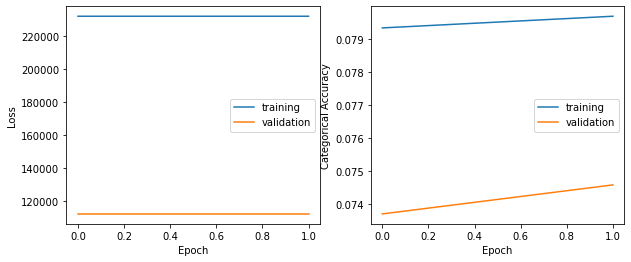

In [34]:
# Let's plot the change in loss and accuracy
fig, axs = plt.subplots(1, 2, figsize = (10,4))

axs[0].plot(history.history['loss'], label='training')
axs[0].plot(history.history['val_loss'], label='validation')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].plot(history.history['accuracy'], label='training')
axs[1].plot(history.history['val_accuracy'], label='validation')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Categorical Accuracy')
axs[1].legend();